In [47]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(vioplot)
library(corrplot)
library(gmodels)
library(matrixStats)

Get the data

In [48]:
insurance <- read.csv('Auto_Insurance_Claims_Sample.csv')
insurance

Customer,Country,State.Code,State,Claim.Amount,Response,Coverage,Education,Effective.To.Date,EmploymentStatus,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Claim.Reason,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
BU79786,US,KS,Kansas,276.3519,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.81115,Two-Door Car,Medsize
QZ44356,US,NE,Nebraska,697.9536,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.46493,Four-Door Car,Medsize
AI49188,US,OK,Oklahoma,1288.7432,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.47225,Two-Door Car,Medsize
WW63253,US,MO,Missouri,764.5862,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.88134,SUV,Medsize
HB64268,US,KS,Kansas,281.3693,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.13088,Four-Door Car,Medsize
OC83172,US,IA,Iowa,825.6298,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.38304,Two-Door Car,Medsize
XZ87318,US,IA,Iowa,538.0899,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.60000,Four-Door Car,Medsize
CF85061,US,NE,Nebraska,721.6100,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.02968,Four-Door Car,Medsize
DY87989,US,IA,Iowa,2412.7504,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.20000,Four-Door Car,Medsize
BQ94931,US,IA,Iowa,738.8178,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.52783,Four-Door Car,Medsize


### Average amount of cliams

In [20]:
mean_claims <- mean(insurance[['Claim.Amount']])
tmean_claims <- mean(insurance[['Claim.Amount']], trim = 0.1)
md_claims <- median(insurance[['Claim.Amount']])

In [21]:
cat("Mean: ", mean_claims, "\n")
cat("Trimmed mean(droping 5% above and below 5% data): ", tmean_claims, "\n")
cat("Median: ", md_claims, "\n")

Mean:  800.494 
Trimmed mean(droping 5% above and below 5% data):  663.105 
Median:  578.0182 


In [22]:
names(insurance)

[1] "Customer"                      "Country"                      
 [3] "State.Code"                    "State"                        
 [5] "Claim.Amount"                  "Response"                     
 [7] "Coverage"                      "Education"                    
 [9] "Effective.To.Date"             "EmploymentStatus"             
[11] "Gender"                        "Income"                       
[13] "Location.Code"                 "Marital.Status"               
[15] "Monthly.Premium.Auto"          "Months.Since.Last.Claim"      
[17] "Months.Since.Policy.Inception" "Number.of.Open.Complaints"    
[19] "Number.of.Policies"            "Policy.Type"                  
[21] "Policy"                        "Claim.Reason"                 
[23] "Sales.Channel"                 "Total.Claim.Amount"           
[25] "Vehicle.Class"                 "Vehicle.Size"

### Weighted mean and weighted median

In [23]:
weighted.mean(insurance[["Total.Claim.Amount"]], w= insurance[["Monthly.Premium.Auto"]])
weightedMedian(insurance[["Total.Claim.Amount"]], w= insurance[["Monthly.Premium.Auto"]])

[1] 501.8499

[1] 444.115

### Plotting

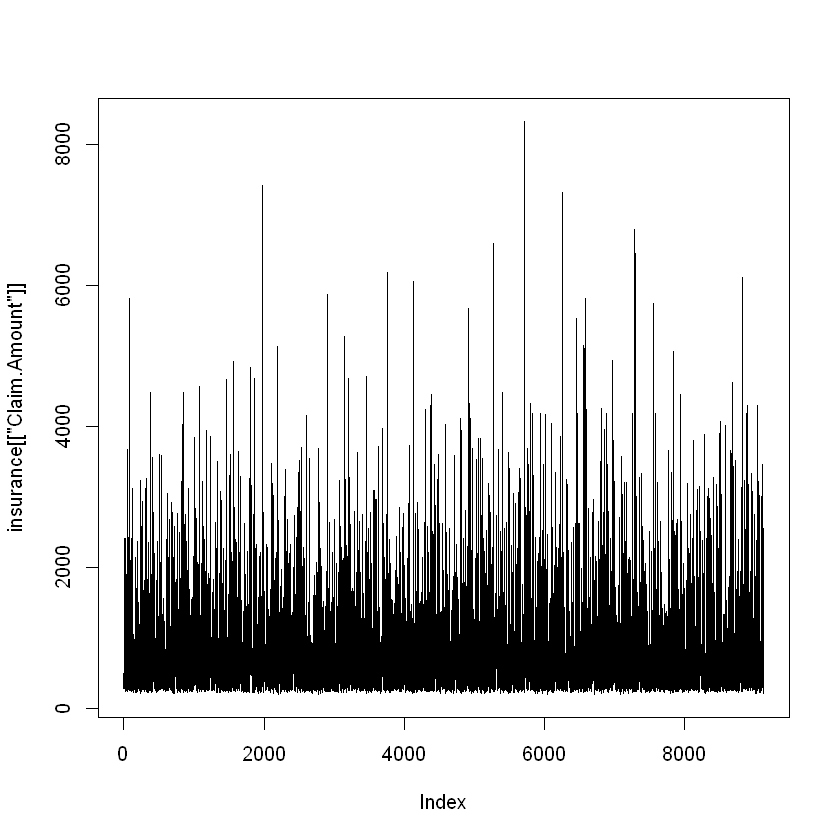

In [24]:
plot(insurance[["Claim.Amount"]], type ='l')

In [25]:
sd(insurance[['Claim.Amount']])

[1] 687.0968

In [26]:
IQR(insurance[['Claim.Amount']])

[1] 496.7915

In [27]:
mad(insurance[['Claim.Amount']])

[1] 365.8899

In [28]:
quantile(insurance[['Claim.Amount']], p = c(.05, .25, .50, .75, .95))

5%       25%       50%       75%       95% 
 247.5109  399.4252  578.0182  896.2167 2206.4361

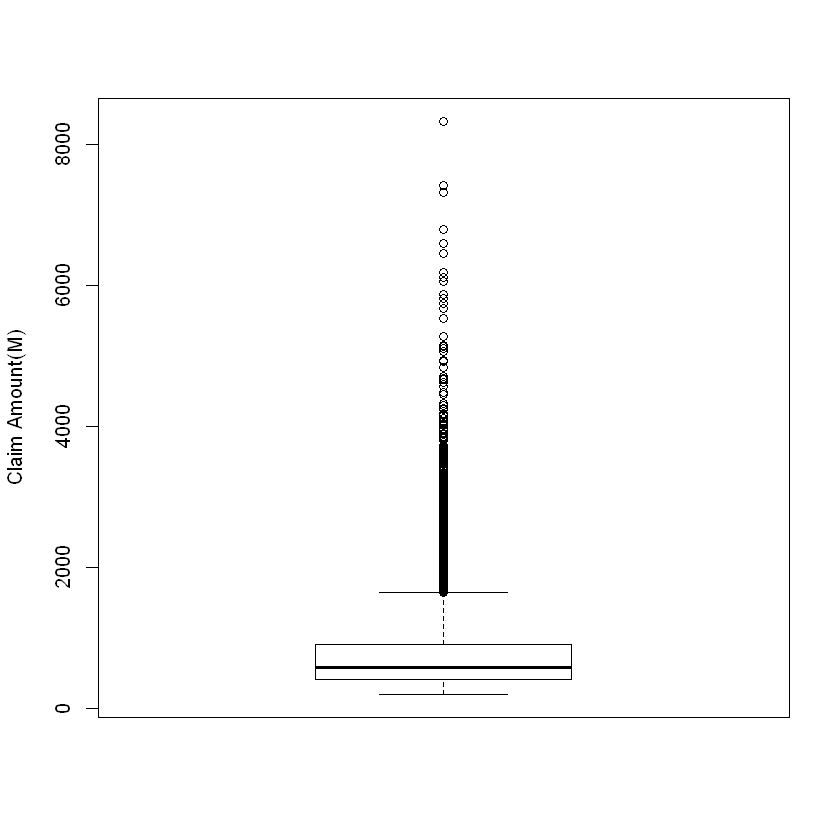

In [29]:
boxplot(insurance[['Claim.Amount']], ylab = 'Claim Amount(M)')

In [30]:
breaks <- seq(from= min(insurance[['Claim.Amount']]), 
              to= max(insurance[['Claim.Amount']]), 
              length = 20)
claim_freq <- cut(insurance[['Claim.Amount']], 
                 breaks = breaks,
                 right = T,
                 include.lowest = T)
table(claim_freq)

claim_freq
          [190,618]      (618,1.05e+03] (1.05e+03,1.48e+03]  (1.48e+03,1.9e+03] 
               4859                2517                 768                 357 
 (1.9e+03,2.33e+03] (2.33e+03,2.76e+03] (2.76e+03,3.19e+03] (3.19e+03,3.62e+03] 
                247                 151                  80                  67 
(3.62e+03,4.05e+03] (4.05e+03,4.48e+03]  (4.48e+03,4.9e+03]  (4.9e+03,5.33e+03] 
                 32                  24                  10                   7 
(5.33e+03,5.76e+03] (5.76e+03,6.19e+03] (6.19e+03,6.62e+03] (6.62e+03,7.05e+03] 
                  3                   6                   2                   1 
(7.05e+03,7.48e+03]  (7.48e+03,7.9e+03]  (7.9e+03,8.33e+03] 
                  2                   0                   1 

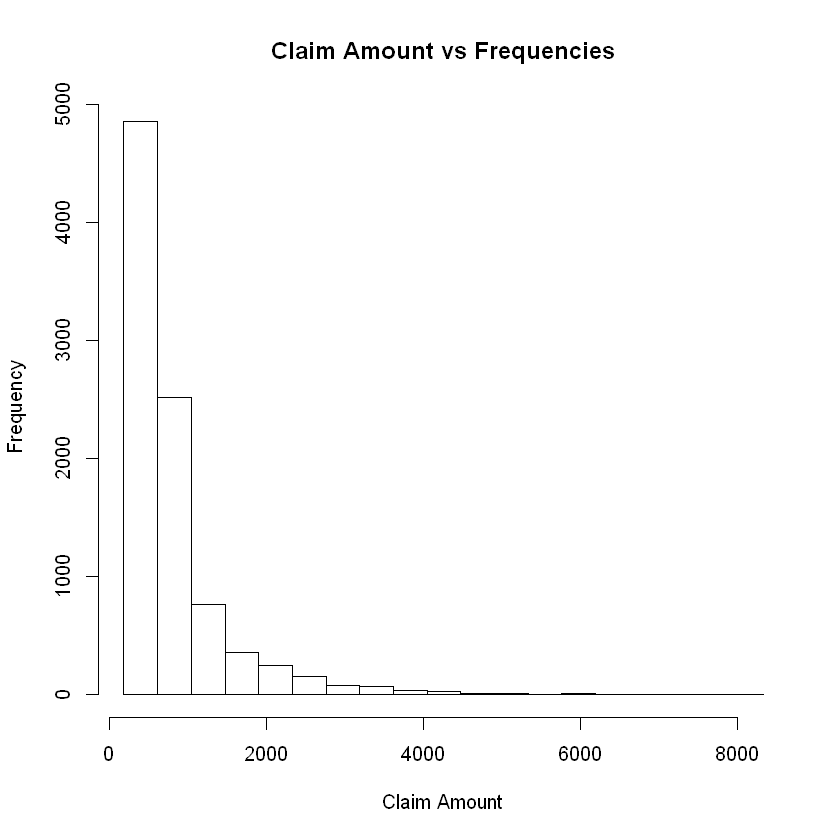

In [31]:
hist(insurance[['Claim.Amount']], breaks = breaks, xlab = 'Claim Amount', main = "Claim Amount vs Frequencies")

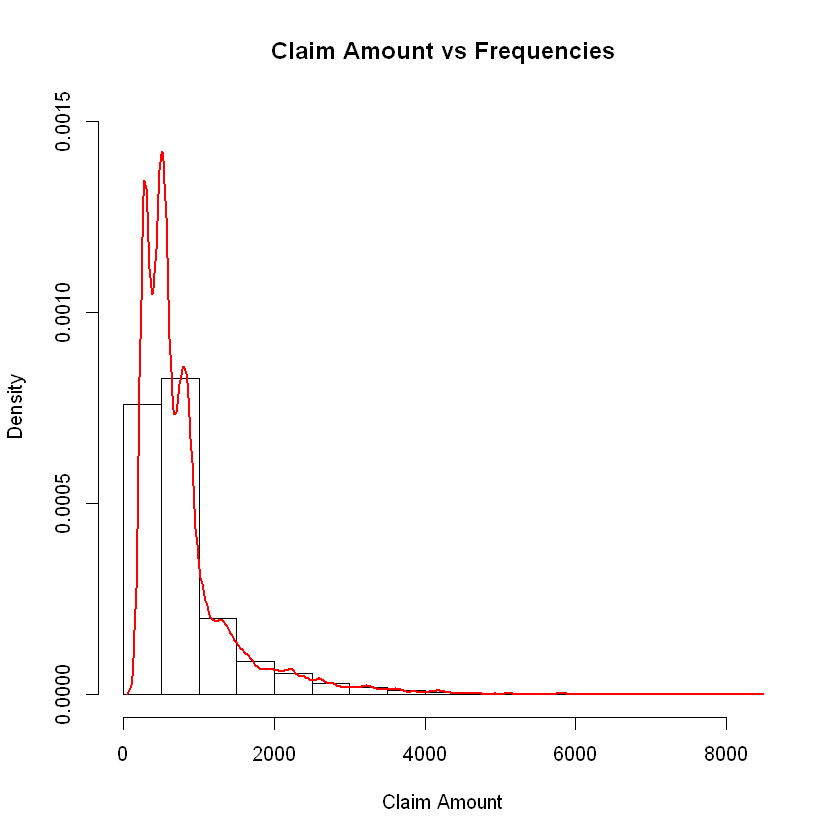

In [32]:
hist(insurance[['Claim.Amount']], 
     freq = F, 
     xlab = 'Claim Amount', 
     main = "Claim Amount vs Frequencies",
     ylim = c(0, 0.0015))
lines(density(insurance[['Claim.Amount']]), lwd = 2, col = 'red')

In [33]:
barplot(as.matrix(dfw) / 6, cex.axis=0.8, cex.names=0.7, 
        xlab='Cause of delay', ylab='Count')

ERROR: Error in as.matrix(dfw): object 'dfw' not found


In [34]:
new_data <- insurance
new_val = new_data %>% 
                group_by(state = new_data[['State.Code']])  %>%
                summarise(mean_claims = mean(Claim.Amount))
# data % > %
#      group_by(lgID) % > %
#      summarise(mean_run = mean(HR))
# new_val

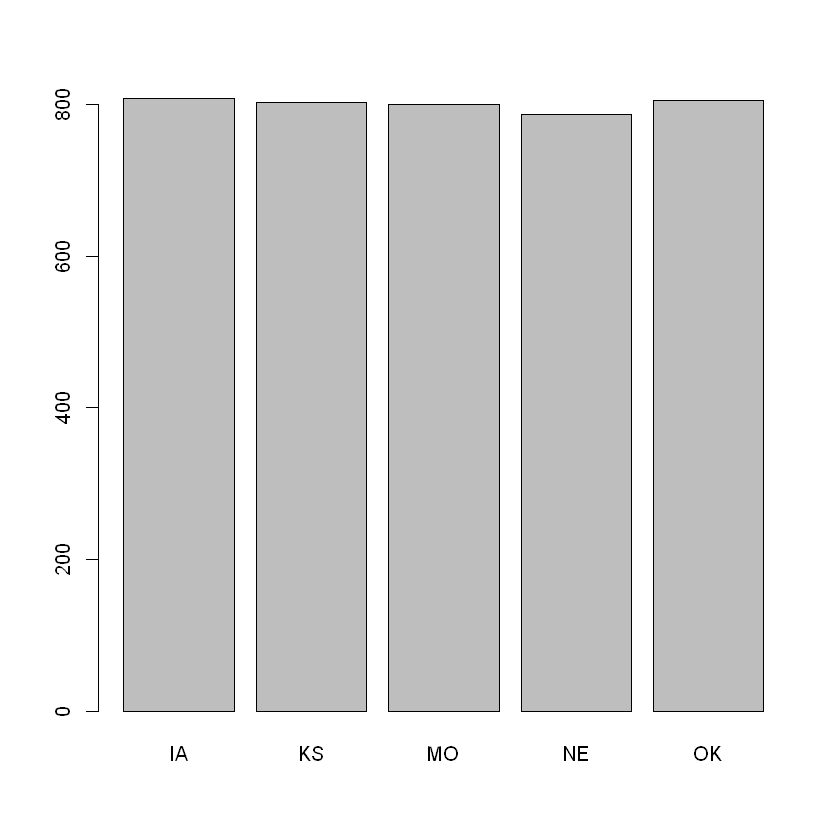

In [142]:
new_mat = as.matrix(new_val)
a = new_mat[,1]
# a
b = as.numeric(new_mat[,2])
# b
# s = t(cbind(new_mat[,1], new_mat[,2]))
# s =cbind(new_mat[,1], new_mat[,2])
# s
# cols = c(1:5)
barplot(b, names.arg = a)
#        col = cols)

In [108]:
library(corrplot)
attach(insurance)
# cor_df = data.frame(Claim.Amount, Income, Monthly.Premium.Auto, Months.Since.Last.Claim, Months.Since.Policy.Inception, Number.of.Open.Complaints, Number.of.Policies, Total.Claim.Amount)
cor_df = data.frame(Claim.Amount, Income, Monthly.Premium.Auto,  Total.Claim.Amount)

# cor_df

In [37]:
names(insurance)

[1] "Customer"                      "Country"                      
 [3] "State.Code"                    "State"                        
 [5] "Claim.Amount"                  "Response"                     
 [7] "Coverage"                      "Education"                    
 [9] "Effective.To.Date"             "EmploymentStatus"             
[11] "Gender"                        "Income"                       
[13] "Location.Code"                 "Marital.Status"               
[15] "Monthly.Premium.Auto"          "Months.Since.Last.Claim"      
[17] "Months.Since.Policy.Inception" "Number.of.Open.Complaints"    
[19] "Number.of.Policies"            "Policy.Type"                  
[21] "Policy"                        "Claim.Reason"                 
[23] "Sales.Channel"                 "Total.Claim.Amount"           
[25] "Vehicle.Class"                 "Vehicle.Size"

In [38]:
# cor_df.row.names = c('Claim Amount', 'Income', 'Monthly Premium', 'Last Claim(M)','Policy Inception(M)', 'Open Complaints', 'Policies', 'Total Claim')


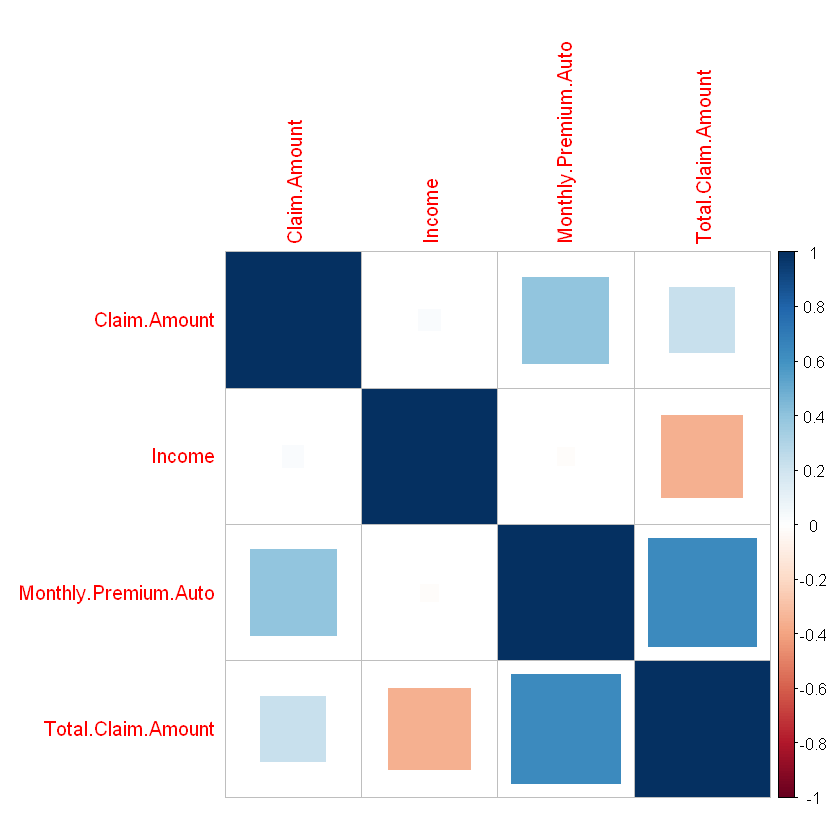

In [39]:
corrplot(cor(cor_df), method= 'square')

[1] 9134   26

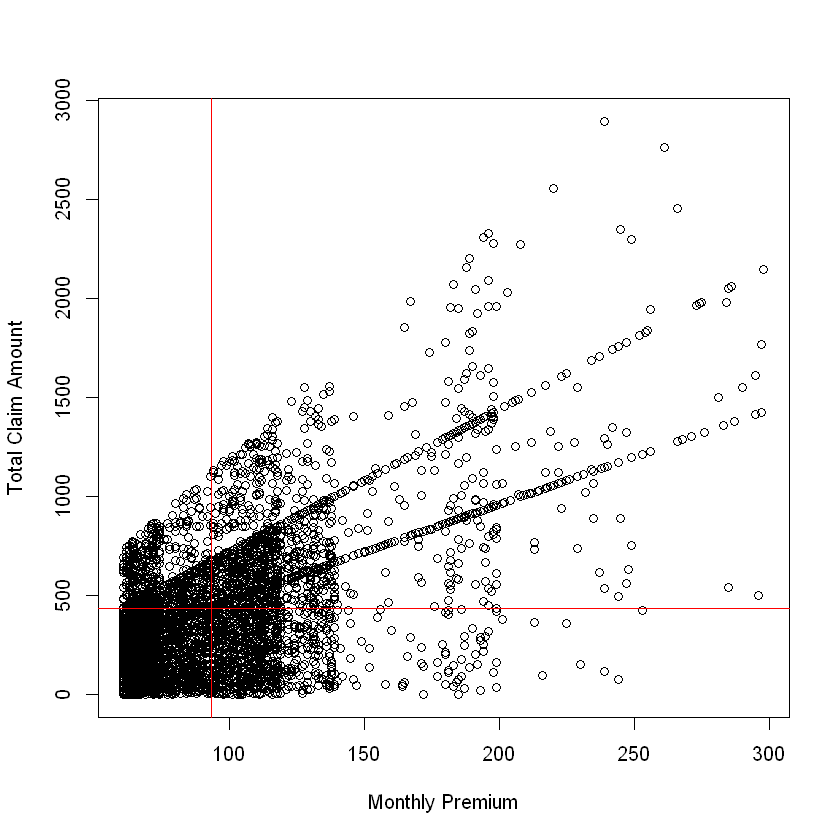

In [45]:
plot(Monthly.Premium.Auto, Total.Claim.Amount, xlab = 'Monthly Premium', ylab = 'Total Claim Amount')
abline(h = mean(Total.Claim.Amount), v = mean(Monthly.Premium.Auto), col = 'red')
# fit = lm(Monthly.Premium.Auto~Total.Claim.Amount,insurance)
# abline(fit)
dim(insurance)

In [110]:
new_subset = subset(insurance, Monthly.Premium.Auto>0 &
                    Income> 10000 &
                    Income < 50000)
nrow(new_subset)

[1] 3545

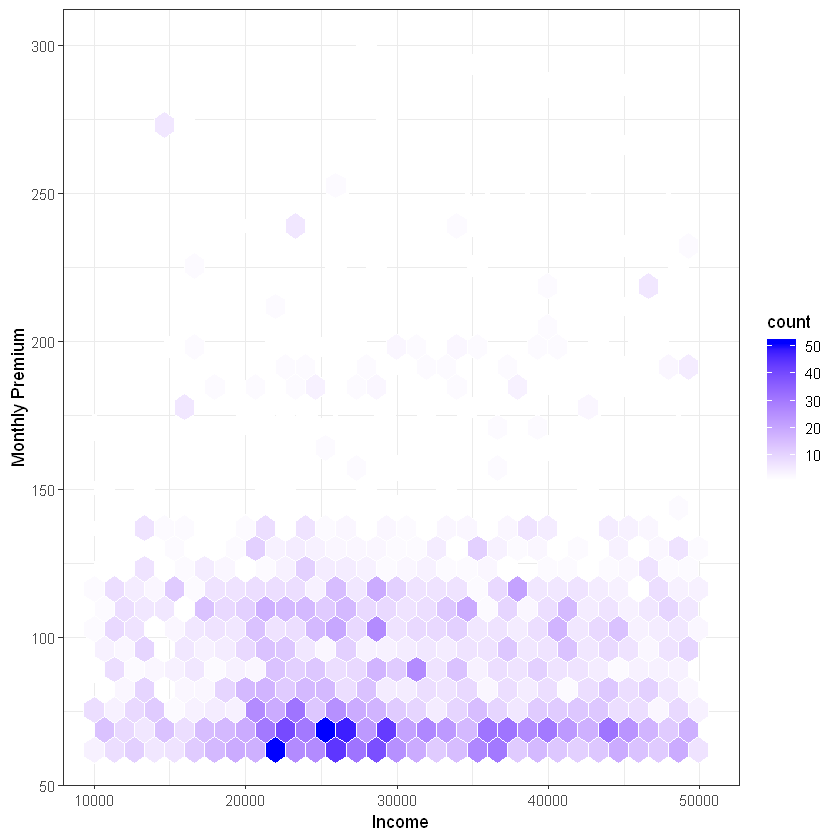

In [111]:
hexgraph = ggplot(new_subset, (aes(y = Monthly.Premium.Auto, x = Income))) +
              stat_binhex(color='white')+
               theme_bw() +
               scale_fill_gradient(low = 'white', high = 'blue') +
               labs(y = 'Monthly Premium', x = 'Income')
hexgraph

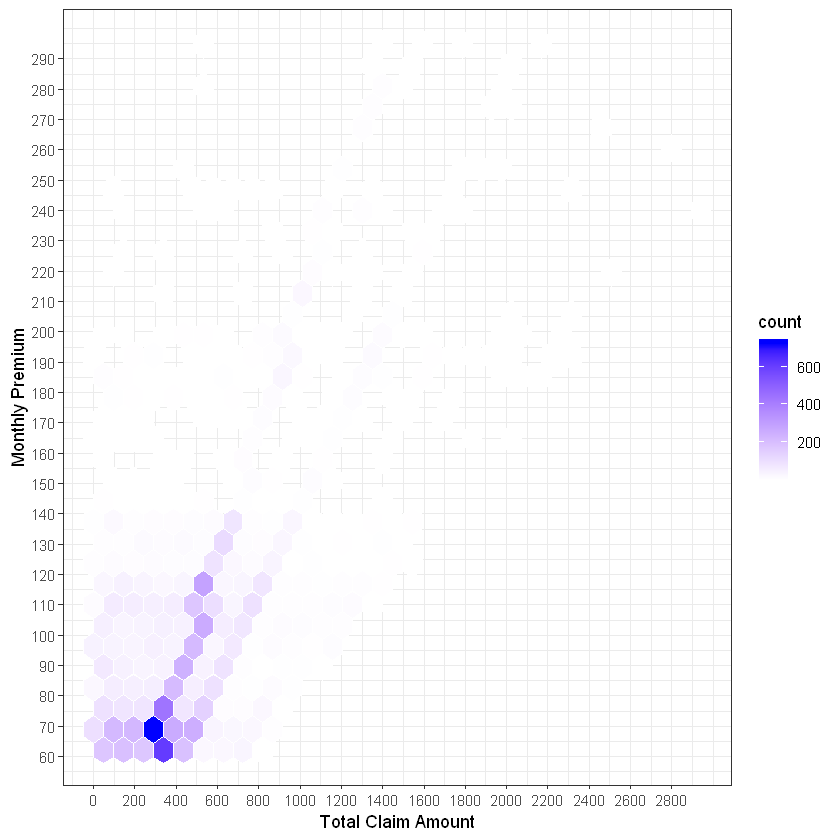

In [140]:
hexgraph = ggplot(insurance, aes(y = Monthly.Premium.Auto, x = Total.Claim.Amount)) +
              stat_binhex(color='white')+
               theme_bw() +
               scale_fill_gradient(low = 'white', high = 'blue') +
               scale_x_continuous(breaks = seq(0, max(Total.Claim.Amount), 200)) +
scale_y_continuous(breaks = seq(0, max(Monthly.Premium.Auto), 10))+
               labs(y = 'Monthly Premium', x = 'Total Claim Amount')
hexgraph

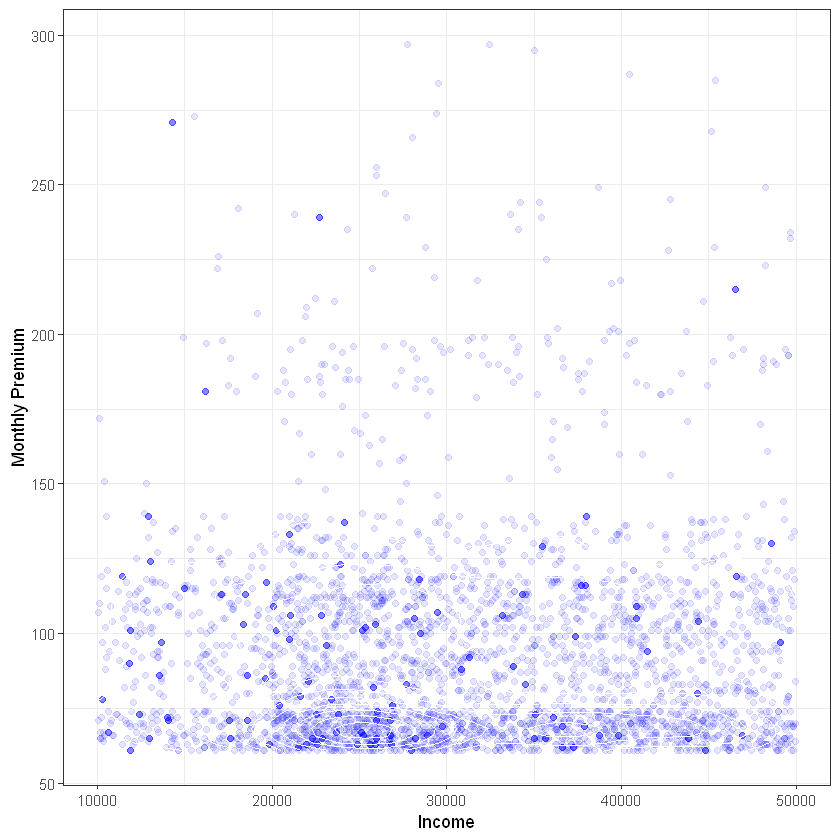

In [67]:
congraph = ggplot(new_subset, aes( x = Income, y = Monthly.Premium.Auto)) +
            theme_bw() +
            geom_point(color = 'blue', alpha = 0.1) +
            geom_density2d(color = 'white') +
            labs(x = 'Income', y = 'Monthly Premium')
congraph

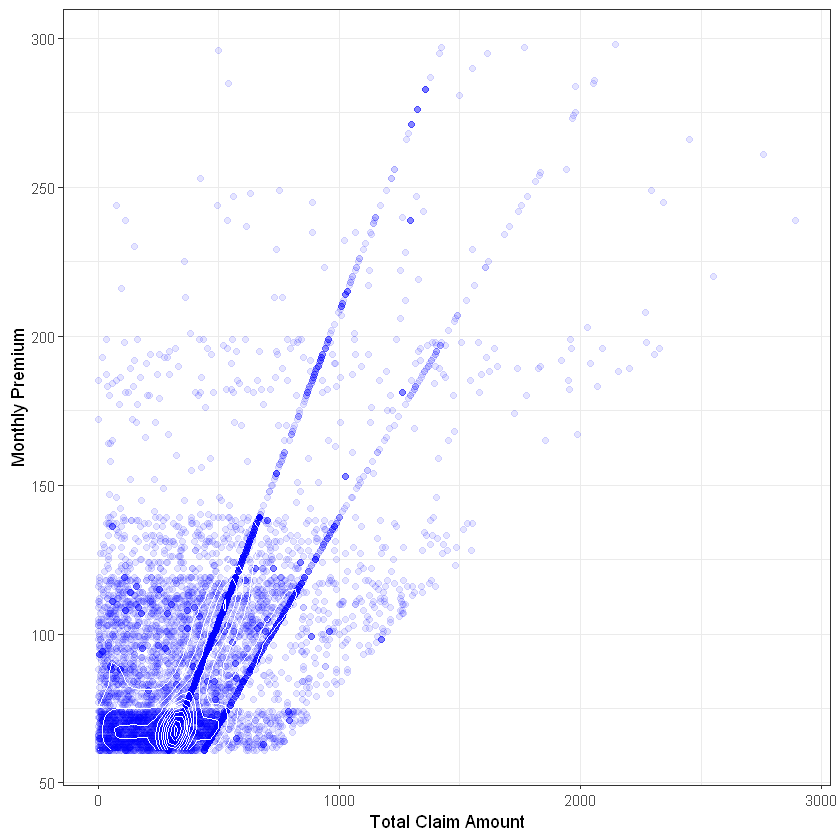

In [66]:
congraph = ggplot(insurance, aes(y = Monthly.Premium.Auto, x = Total.Claim.Amount)) +
            theme_bw() +
            geom_point(color = 'blue', alpha = 0.1) +
            geom_density2d(color = 'white') +
            labs(x = 'Total Claim Amount', y = 'Monthly Premium')
congraph




In [72]:
x_tab = CrossTable(Response, Coverage, prop.c = F, prop.chisq = F,
                    prop.t = F)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  9134 

 
             | Coverage 
    Response |     Basic |  Extended |   Premium | Row Total | 
-------------|-----------|-----------|-----------|-----------|
          No |      4770 |      2352 |       704 |      7826 | 
             |     0.610 |     0.301 |     0.090 |     0.857 | 
-------------|-----------|-----------|-----------|-----------|
         Yes |       798 |       390 |       120 |      1308 | 
             |     0.610 |     0.298 |     0.092 |     0.143 | 
-------------|-----------|-----------|-----------|-----------|
Column Total |      5568 |      2742 |       824 |      9134 | 
-------------|-----------|-----------|-----------|-----------|

 


In [80]:
x_tab = CrossTable(Gender, Location.Code, prop.c = F, prop.chisq = F,
                    prop.t = F)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  9134 

 
             | Location.Code 
      Gender |     Rural |  Suburban |     Urban | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           F |      1004 |      2756 |       898 |      4658 | 
             |     0.216 |     0.592 |     0.193 |     0.510 | 
-------------|-----------|-----------|-----------|-----------|
           M |       769 |      3023 |       684 |      4476 | 
             |     0.172 |     0.675 |     0.153 |     0.490 | 
-------------|-----------|-----------|-----------|-----------|
Column Total |      1773 |      5779 |      1582 |      9134 | 
-------------|-----------|-----------|-----------|-----------|

 


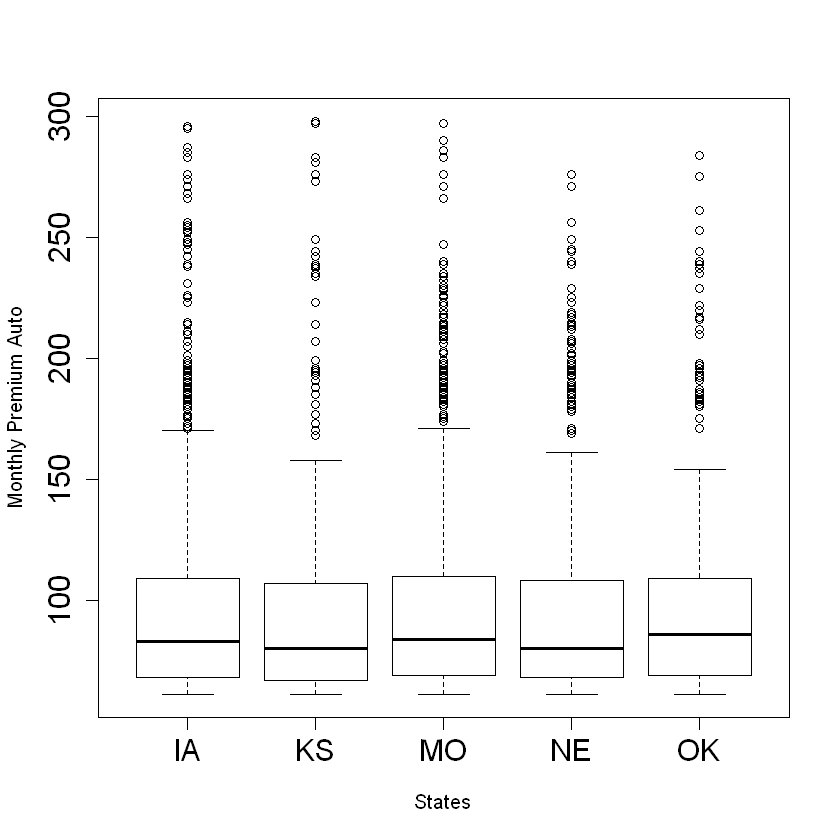

In [91]:
boxplot(Monthly.Premium.Auto ~ State.Code, data = insurance, 
       cex.axis = 1.5, ylab = 'Monthly Premium Auto', xlab = 'States')

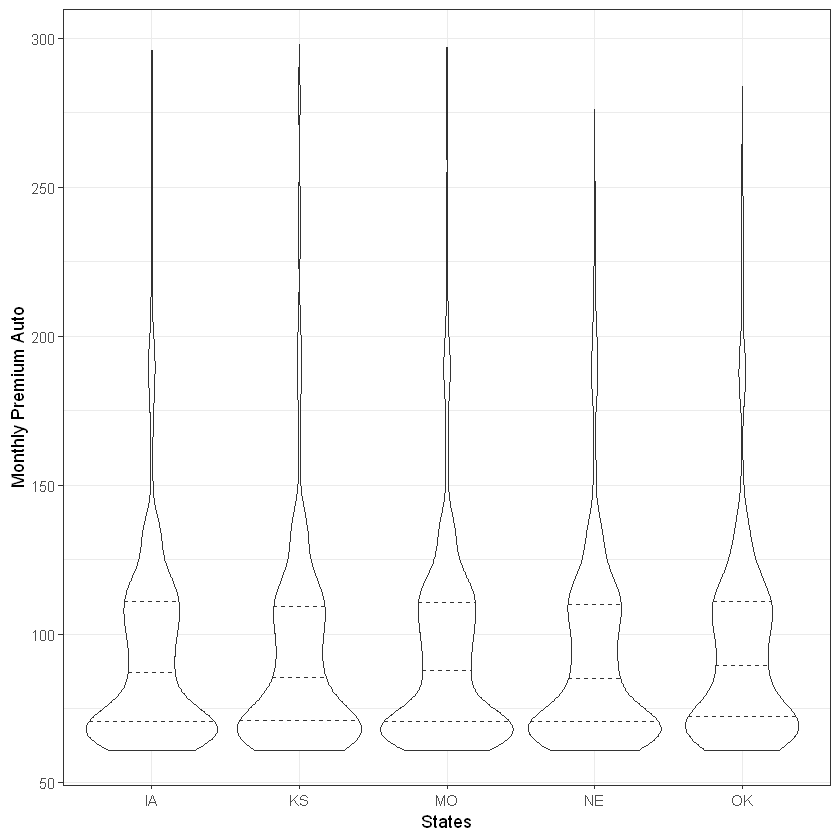

In [96]:
violin_graph = ggplot(insurance, aes(State.Code, Monthly.Premium.Auto)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), linetype = 2) + 
geom_violin(fill = NA, size = 0.5)+
# coord_cartesian(ylim = c(0, 50)) +
labs(x = 'States', y  = 'Monthly Premium Auto') +
theme_bw()

violin_graph

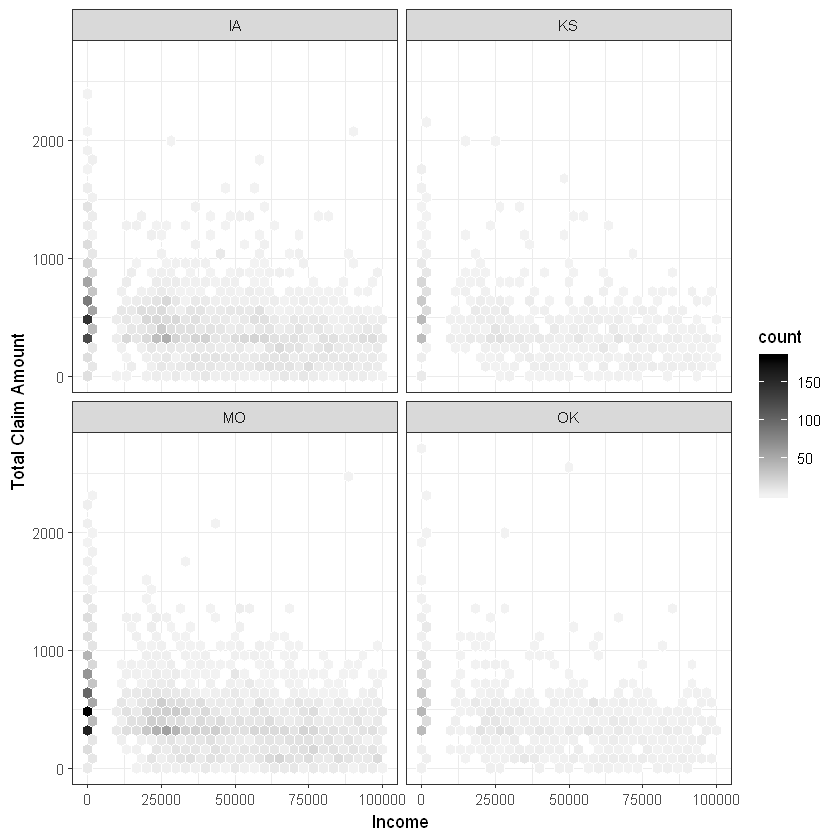

In [104]:
# detach(insurance)
graph = ggplot(subset(insurance, State.Code %in% c('IA', 'KS', 'MO', 'OK')),
                     aes(x = Income, y = Total.Claim.Amount)) +
              stat_binhex(color = 'white') +
theme_bw() +
scale_fill_gradient(low = 'gray95', high = 'black') +
labs(x = 'Income' , y = 'Total Claim Amount') +
facet_wrap('State.Code')

graph

In [99]:
subset(insurance, State.Code %in% c('IA', 'KS', 'MO', 'NE'))

,Customer,Country,State.Code,State,Claim.Amount,Response,Coverage,Education,Effective.To.Date,EmploymentStatus,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Claim.Reason,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
1,BU79786,US,KS,Kansas,276.3519,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.81115,Two-Door Car,Medsize
2,QZ44356,US,NE,Nebraska,697.9536,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.46493,Four-Door Car,Medsize
4,WW63253,US,MO,Missouri,764.5862,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.88134,SUV,Medsize
5,HB64268,US,KS,Kansas,281.3693,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.13088,Four-Door Car,Medsize
6,OC83172,US,IA,Iowa,825.6298,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.38304,Two-Door Car,Medsize
7,XZ87318,US,IA,Iowa,538.0899,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.60000,Four-Door Car,Medsize
8,CF85061,US,NE,Nebraska,721.6100,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.02968,Four-Door Car,Medsize
9,DY87989,US,IA,Iowa,2412.7504,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.20000,Four-Door Car,Medsize
10,BQ94931,US,IA,Iowa,738.8178,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.52783,Four-Door Car,Medsize
11,SX51350,US,MO,Missouri,473.8992,No,Basic,College,2/21/11,Unemployed,...,5,0,3,Personal Auto,Personal L3,Collision,Agent,482.40000,Four-Door Car,Small
